In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', header=None)
train.columns = range(1, 41)
label = pd.read_csv('trainLabels.csv', header=None)
label.columns = ['label']
test = pd.read_csv('test.csv', header=None)
test.columns = range(1, 41)

In [3]:
train_label = train.join(label)

## Simple plotting

In [4]:
def plot2feature(df, f1, f2, label='label'):
    ## This method is used to plot a scatter plot
    ## Input
    ## df: a data frame with all features and a column for binary labels
    ## f1: label for the first feature
    ## f2: label for the second feature
    ## label: label for the binary label, default is 'label"
    for (target, c) in zip((0, 1), ('r', 'g')):
        plt.scatter(df[df[label]==target][f1], df[df[label]==target][f2], c = c, label=str(target), alpha = 0.5)
    plt.legend()
    plt.xlabel(f1)
    plt.ylabel(f2)

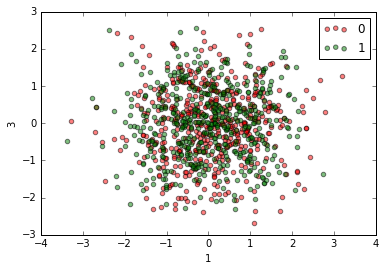

In [5]:
plot2feature(train_label, 1, 3)

In [6]:
from sklearn import cross_validation

In [7]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(train_label[range(1, 41, 1)], 
                                                                     train_label['label'], random_state = 0)

In [8]:
np.mean(y_train)

0.49866666666666665

In [9]:
np.mean(y_test)

0.544

### SVM without reducing dimensionality

In [47]:
from sklearn import svm
svm_clf = svm.SVC()

In [48]:
svm_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
svm_clf.support_.shape

(502,)

In [23]:
def fit_svm(df, features, label = 'label'):
    ### method to perform svm and report accuracy
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features], df[label], random_state = 0)
    svm_clf = svm.SVC(gamma=0.01)
    svm_clf.fit(x_train, y_train)
    return svm_clf.score(x_test, y_test)
    

In [24]:
fit_svm(train_label, range(1, 41))

0.89600000000000002

### Check the distribution of data and scaling

In [15]:
train_label.describe()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [16]:
from sklearn import preprocessing

In [17]:
train_label_scaled = pd.DataFrame(preprocessing.scale(train_label[range(1, 41)]), columns=range(1,41)).join(label)

In [18]:
fit_svm(train_label_scaled, range(1,41))

0.83599999999999997

#### Check the effect of dimensionality

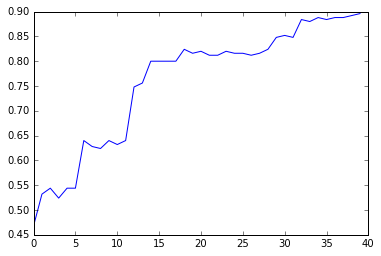

In [91]:

plt.plot([fit_svm(train_label, range(1, i+1)) for i in range(1, 41)])

#### Other metrics

In [19]:
from sklearn import cross_validation
from sklearn.metrics import classification_report

In [103]:
classification_report(y_test, svm_clf.predict(x_test))

'             precision    recall  f1-score   support\n\n          0       0.88      0.92      0.90       114\n          1       0.93      0.89      0.91       136\n\navg / total       0.91      0.90      0.90       250\n'

## gridsearchcv

In [58]:
def gridsearch_svc(parameters, df, features, label='label', scores = ['accuracy']):
    ### perform gridsearchcv for svc model
    ### df: dataframe with training dataset
    ### features: list of feature labels (x's)
    ### label: column name for label (y)
    ### parameters: parameter space for gridsearchcv
    ### scores: list of scoring functions
    
    # get train and test data
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features],
                                                                     df[label], random_state = 0, test_size = 0.1)
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(svm.SVC(), parameters, cv=3,
                           scoring=score)
        clf.fit(x_train, y_train)

        print("Best parameters set found on development set:")
        print
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(x_test)
        print(classification_report(y_true, y_pred))
        print()
    return clf.best_estimator_

In [73]:
tuned_parameters = {'C': [10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [74]:
clf = gridsearch_svc(tuned_parameters, train_label, range(1, 41))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.859 (+/-0.057) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.823 (+/-0.037) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.884 (+/-0.039) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.832 (+/-0.059) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.1}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.01}
0.874 (+/-0.040) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.851 (+/-0.061) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
()
Detailed classification report:
()
The model is trai

In [71]:
clf.support_vectors_.shape

(438, 40)

In [70]:
clf = gridsearch_svc(tuned_parameters, train_label_scaled, range(1, 41))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.866 (+/-0.033) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.826 (+/-0.054) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.816 (+/-0.047) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.506 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 1e-05}
0.858 (+/-0.024) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.836 (+/-0.043) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.818 (+/-0.058) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.816 (+/-0.047) for {'kernel': 'rbf', 'C': 100, 'gamma': 1e-05}
0.858 (+/-0.024) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.01}
0.851 (+/-0.034) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.823 (+/-0.042) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.819 (+/-0.050) for {'kernel': 'rbf', 'C': 1000, 'gamma': 1e-05}
()
Detailed classification report:
()
The model i

In [72]:
clf.support_.shape

(438,)

In [66]:
clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)